 
### [outVar, lon, lat] = getVar_sec(run,var,grid,sectName,ndepth,startYear,endYear)


Get variable in one of the ANHA4 sections.

run = Name of the run (e.g. ANHA4-WJM004), type: string

varName = Variable to be extract (e.g. votemper), type: string

grid = What kind of grid your are looking for 
(e.g. griT, gridU(V),icemod),type: string

sec = The name of the section, type: string

Bering Strait = 3180;
Lancaster Sound = 4180;
Jones Sound = 4180;
Nares Strait = 4270;
Davis Strait = 9360;
Fram Strait = 5360;

ndepth = Number of vertical levels (include surface), type: integer

startYear: First year of interest (2002-2017), type: integer

endYear: Last year of interest, type: integer

Obs:
For the outputs of gridU and gridV, you are getting 2 sections.
Its up to you to keep that way or average to fit into
the gridT coordinates

In [1]:
# -*- coding: utf-8 -*-


# Data related libraries
import pandas as pd
import datetime
import numpy as np
import netCDF4 as nc

# Plotting related libraries
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy import crs as ccrs, feature as cfeature
import seaborn as sns
# for interactive ploting
%matplotlib nbagg    

# Machine specific libraries
import sys
import glob
import os


# Project custom made libaries
sys.path.append('/mnt/storage0/luiz/ANALYSES/SCRIPTS/PYTHON/ANHALIZE/anhalyze/')
import anhalyze_utils as au



In [73]:
years_list = [str(yyyy) for yyyy in np.arange(2005,2018,1)]
month_list = ['{:02d}'.format(mm) for mm in np.arange(6,9,1)]

depth = 38
grid = 'gridT'
var = 'votemper'
run = 'ANHA4-WJM004'
sectName = 'Davis Strait'

In [5]:
def getIndex_sec(sectName='Davis Strait'):

# Return the number associated to each section.
# Once can check the respective numbers and sections on the Lab Guide.


    if sectName == 'Bering Strait':
        sect = 3180
    elif sectName=='Lancaster Sound':
        sect = 4180
    elif sectName=='Jones Sound':
        sect = 4180
    elif sectName=='Nares Strait':
        sect = 4270
    elif sectName=='Davis Strait':
        sect = 9360
    elif sectName=='Fram Strait':
        sect = 5360
    else:
        print("Section name not found.\nCall help/doc to check the sections available in this function.")
        
    return sect

In [ ]:
def getVar_sec(run, sectName=None, grid=None, depth=50, years_list='2011', month_list='01', var=None)

   
    

()

In [11]:
def get_paths(run='ANHA4-WJM004'):
    """ Get paths to data and mask standard locations."""
    # TODO: need to generalize if other people is gonna use this code.
    run = run.upper()
    
    if sys.platform == "linux" or sys.platform == "linux2":
        # linux
        # setup paths
        # Set directory and sections mask file
        
        if any([x in run.split('-')[1][1:3].upper() for x in ["JM","PM"]]):
    
            mask_path = "/mnt/storage0/jmarson/ANALYSES/MASKS/"
            data_path = '/mnt/storage0/jmarson/NEMO/ANHA4/{}-S/'.format(run)
        
        
        elif run.split('-')[1][1:3].upper() == 'MC':
            user = os.environ['USER']
            
            mask_path = "/mnt/storage0/{}/ANALYSES/MASKS/".format(user)
            data_path = '/mnt/storage0/madhurima/NEMO/ANHA4/{}-S/'.format(run)
        
        else:
            data_path = ''
            mask_path = ''
        
    else:
        data_path = ''
        mask_path = ''
        # raise ValueError("Platform not recognized.")

    return data_path, mask_path

In [21]:
data_path, mask_path = get_paths(run=run)

In [14]:
    def get_file_list(run='ANHA4-WJM004',grid=None, years_list=None, month_list=None, one_per_month=False):
        """  Returns file list given a list of years, a grid type,
             and either all the days in a month, or the first one.
        """

        # Setup
        selected_file_list = []
        monthly_file_list = []
        if month_list is None:
            month_list = []

            
        # Get paths
        data_path, mask_path = get_paths(run=run)

        # Get complete file list from path
        file_list = os.listdir(data_path)

        # Selecting list of files given params
        for year in years_list:
            selected_file_list += (sorted([f for f in file_list if '_y'+year in f and '_'+grid in f]))

        # Selecting first day on given month
        if one_per_month:
            if not month_list:
                month_list = [get_date(filename, how='m') for filename in selected_file_list]

            for year in years_list:
                for month in month_list:
                    file_name_stump = 'y{}m{}'.format(year, month)
                    file_month_name = [f for f in selected_file_list if file_name_stump in f][0]
                    monthly_file_list.append(file_month_name)
        else:
            # Make month selection
            if month_list:
                for year in years_list:
                    for month in month_list:
                        file_name_stump = 'y{}m{}'.format(year, month)
                        file_month_names = [f for f in selected_file_list if file_name_stump in f]
                        monthly_file_list += file_month_names

        if monthly_file_list:
            selected_file_list = monthly_file_list

        # Adding full path to filenames
        selected_file_list = [data_path+filename for filename in selected_file_list]

        return selected_file_list


In [77]:
var_data.shape

(1, 38, 27)

In [15]:
file_list = get_file_list(grid=grid, years_list=years_list, month_list=month_list, one_per_month=False)




In [76]:
var_data = np.empty([1, depth, len(i)])

In [142]:
def getMask_sec(run='ANHA4-WJM004',sectName='Davis Strait',i=None,j=None):

        # Get paths
        data_path, mask_path = get_paths(run=run)
        mask_file = mask_path + '/ANHA4_mask.nc'
        
        if any([n in sectName for n in ["Davis","Lancaster","Jones","Bering"]]):
    
            mask = nc.Dataset(mask_file)
            mask_sect = np.squeeze(mask['tmask'][:,:depth,i[0]:i[-1]+1,j[0]:j[-1]+1],axis=2)
                                              
        else:           
            mask = nc.Dataset(mask_file)
            mask_sect = np.squeeze(mask['tmask'][:,:depth,i[0]:i[-1]+1,j[0]:j[-1]+1],axis=3)
        
        return mask_sect[:].data

In [143]:
mask_sect = getMask_sec(run=run, sectName=sectName,i=i,j=j)

In [144]:
mask_sect

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [146]:
# Get the Index from the transect tracer mask
# Here you need to change the folder to the directory you copied
# the mask file. Usually, we save the masks into the path:
# /mnt/storage0/USERNAME/ANALYSES/MASKS


fileMask = mask_path+'ANHA4_trc_sec_mask_Nov2022.nc';


if os.path.isfile(fileMask):
    # Get tmask data
    mask = nc.Dataset(fileMask);
    tmask = mask['tmask'][:].data
    
    # Get the i's and j's indices
    sect = getIndex_sec()
    
    i = np.where(tmask == sect)[0]
    j = np.where(tmask == sect)[1]
    

# Extract the section
var_data = np.empty([1, depth, len(i)])

mask_sect = getMask_sec(run=run,sectName=sectName,i=i,j=j)

if any([n in sectName for n in ["Davis","Lancaster","Jones","Bering"]]):
    
    for filename in file_list:
        ds = nc.Dataset(filename)
        ds_var = np.squeeze(ds[var][:,:depth,i[0]:i[-1]+1,j[0]:j[-1]+1],axis=2)
        ds_var[mask_sect == 0] = np.nan
        var_data = np.append(var_data,ds_var.data,axis=0)
                                              
else:           
    for filename in file_list:
        ds = nc.Dataset(filename)
        ds_var = np.squeeze(ds[var][:,:depth,i[0]:i[-1]+1,j[0]:j[-1]+1],axis=3)
        ds_var[mask_sect == 0] = np.nan
        var_data = np.append(var_data,ds_var,axis=0) 
        
return var_data[1:,:,:,:]

In [147]:
ds_var

masked_array(
  data=[[[1.9415516, 1.8914644, 1.922906 , ..., 7.0240293, 7.0686913,
          7.1086884],
         [1.8639585, 1.8051906, 1.8641546, ..., 7.0258875, 7.0708637,
          7.1110435],
         [1.815083 , 1.746654 , 1.8286785, ..., 7.027775 , 7.0728607,
          7.112823 ],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

(1, 50, 800, 544)

<IPython.core.display.Javascript object>


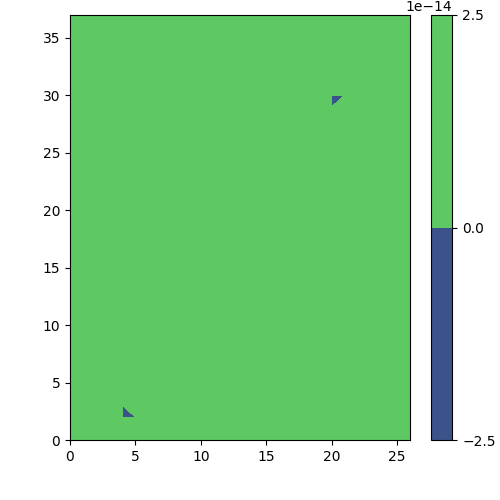

In [150]:
zvec = ds['deptht'][:depth]

fig = plt.figure(figsize=(5,5))
ax = plt.axes([0.14,0.12,0.85,0.85])
cf = ax.contourf(np.squeeze(var_data[0,:,:]))
fig.colorbar(cf)